In [1]:
# Imports
import pandas as pd
import csv
from datetime import date, timedelta
import folium
import requests
from folium import Marker
from folium.plugins import MarkerCluster
import math
import matplotlib.pyplot as plt
import seaborn as sns
from requests.auth import HTTPBasicAuth
import json
from pandas import json_normalize
import pandas
import numpy as np

In [2]:
#opens json data for vaccine administration for US states and territories
with open('vaccine_admin.json') as f:
    vaccine_admin_json=json.load(f)



In [3]:
vaccine_admin_json
vaccine_admin_json['vaccination_data'][1]['LongName']


'Alaska'

In [4]:
#formats the json data into a dataframe
vaccine_admin_df= vaccine_admin_json['vaccination_data']
us_vaccine_admin_df=json_normalize(vaccine_admin_df)

#removes the first row for the general US, unless wanted, I can put it back

us_vaccine_admin_df=us_vaccine_admin_df.iloc[1:,:]

#removes the first column which includes the date
us_vaccine_admin_df=us_vaccine_admin_df.iloc[:,1:]

us_vaccine_admin_df



,Location,ShortName,LongName,Census2019,date_type,Doses_Distributed,Doses_Administered,Dist_Per_100K,Admin_Per_100K,Administered_Moderna,...,Additional_Doses_50Plus,Additional_Doses_50Plus_Vax_Pct,Additional_Doses_18Plus,Additional_Doses_18Plus_Vax_Pct,Additional_Doses_65Plus,Additional_Doses_65Plus_Vax_Pct,Additional_Doses_Moderna,Additional_Doses_Pfizer,Additional_Doses_Janssen,Additional_Doses_Unk_Manuf
1,AK,AKA,Alaska,731545,Report,1125115,847207,153800,115811,323201,...,26282,15.6,36947,10.4,15901,21.2,NaN,NaN,NaN,NaN
2,AL,ALA,Alabama,4903185,Report,6999770,4732829,142760,96526,2049081,...,113302,9.1,134294,6.5,85455,13.2,NaN,NaN,NaN,NaN
3,AR,ARA,Arkansas,3017804,Report,4256950,3161353,141061,104757,1330606,...,75840,10.1,95807,7.2,56253,14.4,NaN,NaN,NaN,NaN
4,AS,ASA,American Samoa,55689,Report,68550,65441,123094,117512,17918,...,8,0.0,16,0.0,1,0.0,NaN,NaN,NaN,NaN
5,AZ,AZA,Arizona,7278717,Report,10410270,8578327,143023,117855,3396918,...,196536,10.1,234139,6.5,152772,14.7,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,VT,VTA,Vermont,623989,Report,1120670,946774,179598,151729,363314,...,34214,14.5,39009,9.4,28478,23.5,NaN,NaN,NaN,NaN
60,WA,WAA,Washington,7614893,Report,11999595,10055713,157581,132053,3733446,...,260093,11.8,316967,7.0,200854,18.6,NaN,NaN,NaN,NaN
61,WI,WIA,Wisconsin,5822434,Report,7923035,7141619,136078,122657,2683589,...,229763,12.7,278437,8.8,181242,19.4,NaN,NaN,NaN,NaN
62,WV,WVA,West Virginia,1792147,Report,3079635,1583779,171841,88373,702426,...,32630,7.2,39889,5.6,23079,8.7,NaN,NaN,NaN,NaN


In [5]:
us_vaccine_admin_df
us_vaccine_admin_df.drop(
            labels=['date_type','ShortName','Administered_Unk_Manuf','Distributed_Unk_Manuf','Series_Complete_Unk_Manuf',
            'Series_Complete_Unk_Manuf_18Plus','Series_Complete_Unk_Manuf_65Plus',
            'Series_Complete_Yes','Administered_65Plus_Entity','Series_Complete_Unk_Manuf_12Plus',
            'Administered_12Plus_Entity','Additional_Doses_Moderna','Additional_Doses_Pfizer',
            'Additional_Doses_Janssen','Additional_Doses_Unk_Manuf'],
            axis=1,
            inplace=True
            )

In [6]:
#removes us territories from dataframe
us_vaccine_admin_df.drop(
            labels=[4,6,11,
            14,16,20,
            29,33,48,
            50, 57, 58],
            axis=0,
            inplace=True
            )


In [7]:
#resets index
us_vaccine_admin_df=us_vaccine_admin_df.reset_index(drop=True)
us_vaccine_admin_df

,Location,LongName,Census2019,Doses_Distributed,Doses_Administered,Dist_Per_100K,Admin_Per_100K,Administered_Moderna,Administered_Pfizer,Administered_Janssen,...,Series_Complete_Janssen_12Plus,Count_70pct_vacc,additional_doses,Additional_Doses_Vax_Pct,Additional_Doses_50Plus,Additional_Doses_50Plus_Vax_Pct,Additional_Doses_18Plus,Additional_Doses_18Plus_Vax_Pct,Additional_Doses_65Plus,Additional_Doses_65Plus_Vax_Pct
0,AK,Alaska,731545,1125115,847207,153800,115811,323201,487694,35738,...,33358,NaN,37109,9.7,26282,15.6,36947,10.4,15901,21.2
1,AL,Alabama,4903185,6999770,4732829,142760,96526,2049081,2543054,140547,...,142587,NaN,134615,6.2,113302,9.1,134294,6.5,85455,13.2
2,AR,Arkansas,3017804,4256950,3161353,141061,104757,1330606,1726842,100890,...,98909,NaN,95994,6.7,75840,10.1,95807,7.2,56253,14.4
3,AZ,Arizona,7278717,10410270,8578327,143023,117855,3396918,4869225,296712,...,286585,NaN,234894,6.1,196536,10.1,234139,6.5,152772,14.7
4,CA,California,39512223,61020085,52869188,154433,133805,19711065,31240203,1903579,...,1890013,NaN,1381200,5.7,1079731,10.3,1378787,6.2,794340,16.5
5,CO,Colorado,5758736,8677815,7499427,150690,130227,2883078,4334110,276794,...,271938,NaN,279350,7.9,216933,14.2,278762,8.5,171100,23.7
6,CT,Connecticut,3565287,5924555,5265418,166173,147686,1892190,3162808,209168,...,208233,NaN,159353,6.3,144307,11.5,159158,6.8,120643,20.5
7,DC,District of Columbia,705749,1276265,1040743,180838,147466,381966,626950,31380,...,35164,NaN,20693,4.7,15012,9.1,20646,4.9,11016,14.8
8,DE,Delaware,973764,1618635,1268810,166225,130300,478217,737566,51555,...,51053,NaN,37414,6.4,33511,10.4,37360,6.8,27237,16.2
9,FL,Florida,21477737,34307395,27897250,159735,129889,10259692,16310153,1227187,...,1208341,NaN,892426,7.0,798104,11.2,890970,7.4,642853,16.6


In [8]:
#changes headers
us_vaccine_admin_df=us_vaccine_admin_df.rename(columns={
    'Location':'Abrev_Name',
    'LongName':'State',
    'Census2019': 'Total_Population',
    'Administered_Janssen':'Administered_J&J',
    'Administered_Dose1_Recip':'Administered_Dose1',
    'Administered_Dose1_Pop_Pct':'Administered_Dose1_Percentage',
    'Administered_Dose2_Pop_Pct':'Administered_Dose2_Percentage',
    'Administered_Dose1_Recip_18Plus':'Administered_Dose1_18Plus',
    'Administered_Dose1_Recip_18PlusPop_Pct':'Administered_Dose1_18Plus_Pop_Percentage',
    'Administered_Dose1_Recip_65Plus':'Administered_Dose1_65Plus',
    'Administered_Dose1_Recip_65PlusPop_Pct':'Administered_Dose1_65Plus_Pop_Percentage',
    'Distributed_Janssen':'Distributed_J&J',
    'Series_Complete_Janssen':'Series_Complete_J&J',
    'Series_Complete_Janssen_18Plus':'Series_Complete_J&J_18Plus',
    'Series_Complete_Janssen_65Plus':'Series_Complete_J&J_65Plus',
    'Series_Complete_18PlusPop_Pct':'Series_Complete_18PlusPop_Percentage',
    'Series_Complete_65PlusPop_Pct':'Series_Complete_65PlusPop_Percentage',
    'Census2019_12PlusPop':'12Plus_Population',
    'Administered_Dose1_Recip_12Plus':'Administered_Dose1_12Plus',
    'Administered_Dose1_Recip_12PlusPop_Pct':'Administered_Dose1_12Plus_Pop_Percentage',
    'Administered_Dose2_Recip_12Plus':'Administered_Dose2_12Plus',
    'Administered_Dose2_Recip_12PlusPop_Pct':'Administered_Dose2_12Plus_Pop_Percentge',
    'Series_Complete_12PlusPop_Pct':'Series_Complete_12PlusPop_Percentage',
    'Series_Complete_Janssen_12Plus':'Series_Complete_J&J_12Plus',
    'additional_doses':'Additional_Doses_Administered',
    'Additional_Doses_Vax_Pct':'Additional_Doses_Administered_Percentage',
    'Additional_Doses_50Plus_Vax_Pct':'Additional_Doses_50Plus_Percentage',
    'Additional_Doses_18Plus_Vax_Pct':'Additional_Doses_18Plus_Percentage',
    'Additional_Doses_65Plus_Vax_Pct':'Additional_Doses_65Plus_Percentage'})
us_vaccine_admin_df

,Abrev_Name,State,Total_Population,Doses_Distributed,Doses_Administered,Dist_Per_100K,Admin_Per_100K,Administered_Moderna,Administered_Pfizer,Administered_J&J,...,Series_Complete_J&J_12Plus,Count_70pct_vacc,Additional_Doses_Administered,Additional_Doses_Administered_Percentage,Additional_Doses_50Plus,Additional_Doses_50Plus_Percentage,Additional_Doses_18Plus,Additional_Doses_18Plus_Percentage,Additional_Doses_65Plus,Additional_Doses_65Plus_Percentage
0,AK,Alaska,731545,1125115,847207,153800,115811,323201,487694,35738,...,33358,NaN,37109,9.7,26282,15.6,36947,10.4,15901,21.2
1,AL,Alabama,4903185,6999770,4732829,142760,96526,2049081,2543054,140547,...,142587,NaN,134615,6.2,113302,9.1,134294,6.5,85455,13.2
2,AR,Arkansas,3017804,4256950,3161353,141061,104757,1330606,1726842,100890,...,98909,NaN,95994,6.7,75840,10.1,95807,7.2,56253,14.4
3,AZ,Arizona,7278717,10410270,8578327,143023,117855,3396918,4869225,296712,...,286585,NaN,234894,6.1,196536,10.1,234139,6.5,152772,14.7
4,CA,California,39512223,61020085,52869188,154433,133805,19711065,31240203,1903579,...,1890013,NaN,1381200,5.7,1079731,10.3,1378787,6.2,794340,16.5
5,CO,Colorado,5758736,8677815,7499427,150690,130227,2883078,4334110,276794,...,271938,NaN,279350,7.9,216933,14.2,278762,8.5,171100,23.7
6,CT,Connecticut,3565287,5924555,5265418,166173,147686,1892190,3162808,209168,...,208233,NaN,159353,6.3,144307,11.5,159158,6.8,120643,20.5
7,DC,District of Columbia,705749,1276265,1040743,180838,147466,381966,626950,31380,...,35164,NaN,20693,4.7,15012,9.1,20646,4.9,11016,14.8
8,DE,Delaware,973764,1618635,1268810,166225,130300,478217,737566,51555,...,51053,NaN,37414,6.4,33511,10.4,37360,6.8,27237,16.2
9,FL,Florida,21477737,34307395,27897250,159735,129889,10259692,16310153,1227187,...,1208341,NaN,892426,7.0,798104,11.2,890970,7.4,642853,16.6


In [14]:
#us_temp = us_vaccine_admin_df.copy()

#us_temp["Region"] = ""

#display(us_temp)

#Locations = ["CA", "WA", "NV", "OR", "ID", "MT", "WY", "UT", "CO", "AZ", "NM", "AK", "HI"]

#for Location in Locations:
   # display(Location)
   # us_temp.loc[us_temp["Abrev_Name"] == Location : "Region"] = "West"

#Locations = ["ND", "SD", "NE", "KS", "MN", "IA", "MO", "IL", "WI", "IN", "MI", "OH"]

#for Location in Locations:
#    us_temp.loc[us_temp["Abrev_Name"] == Location : "Region"] = "Mid-West"
    
#Locations = ["TX", "OK", "AR", "LA", "MS", "AL", "TN", "KY", "WV", "VA", "NC", "SC", "GA", "FL", "MD", "DE"]

#for Location in Locations:
#    us_temp.loc[us_temp["Abrev_Name"] == Location : "Region"] = "South"
    
#Locations = ["PA", "ME", "NH", "NY", "VT", "MA", "RI", "CT", "NJ"]
#for Location in Locations:
#    us_temp.loc[us_temp["Abrev_Name"] == Location : "Region"] = "North-East"
    
#for i, s in dfb.iterrows():
             #dfa.loc[(dfa.index>=s['beg']) & (dfa.index<=s['end']),'in_b'] = True

#display(us_temp)

In [10]:
#i tried to loop through dataframe and match to lists, using if statements, but it wouldn't match the columns to the lists
#i can get it to match by hard coding but not automatically
#if anyone knows how to get it to match the lists, it is easy to put it into the data frame as a new column
PST='CA|WA|NV'
HAST=['HI']
AST=['AK']
MST=['AR', 'CO', 'MT', 'NM', 'UT', 'WY']
CST=['AL','AR','IA', 'MN', 'MO', 'MS', 'NE','OK','WI']
EST=['CT', 'DE', 'GA', 'ME', 'MA', 'MI', 'NH', 'NJ', 'NY','NC', 'OH', 'PA', 'RI', 'SC', 'VT', 'VA', 'DC','WV']
PST_MST=['ID', 'OR']
EST_CST=['FL','IN','KY','TN']
CST_MST=['KS','TX', 'SD']
Timezone=[]
states=us_vaccine_admin_df['Location']  

for state in states:


SyntaxError: unexpected EOF while parsing (437677186.py, line 16)

In [ ]:
1. How many vaccine doses were administered per region?

2. Which region has the highest percent of doses administered (out of doses distributed)?

In [68]:
us_vaccine_admin_df.to_csv("us_temp")
us_temp = pd.read_csv("us_temp.csv")

print(type(us_temp))
#display(us_temp)

us_total = us_temp["Doses_Administered"].sum()

#display(us_total)

total_agg1 = us_temp.groupby("Region").agg(Total_Administered=("Doses_Administered",'sum'),Total_Distributed=("Doses_Distributed",'sum'))                   
print(type(region_agg))

total_agg1=total_agg1.rename(columns={
    'Total_Administered':'Total Administered',
    'Total_Distributed':'Total Distributed'})
#print(type(region_agg))
#region_agg.style.format({"Administered Region to US":"{:,.2f}%","Region Administered to Distributed":"{:,.2f}%"})


#purchase_agg = purchase_agg.style.format({"Average Purchase Price": "${:20,.2f}","Total Purchase Value":"${:20,.2f}",'Avg Total Purchase per Person':"${:20,.2f}"})

display(total_agg1)


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


,Total Administered,Total Distributed
Region,,
Mid-West,78196834,95562685
North-East,77817989,90808125
South,145271205,185817805
West,100744529,118776710


<AxesSubplot:xlabel='Region'>

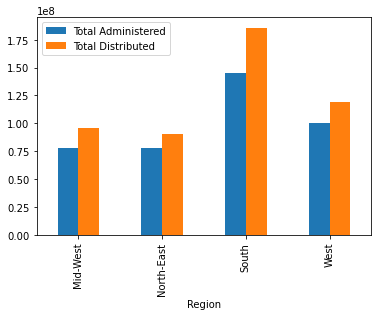

In [69]:
total_agg1.plot.bar()

In [66]:
total_agg2 = total_agg1["Region_US_Admin_Ratio"] = round(us_temp.groupby("Region").agg(Total_Administered=("Doses_Administered",'sum'))/us_total*100, 2)

total_agg2["Region_Admin_Dist_Ratio"] = round(total_agg1.loc[:,"Total Administered"]/total_agg1.loc[:,"Total Distributed"]*100,2)

total_agg2=total_agg2.rename(columns={
    'Total_Administered':'Administered Region to US',
    'Region_Admin_Dist_Ratio':'Region Administered to Distributed'})

display(total_agg2)

,Administered Region to US,Region Administered to Distributed
Region,,
Mid-West,19.40,81.83
North-East,19.31,85.69
South,36.04,78.18
West,24.99,84.82


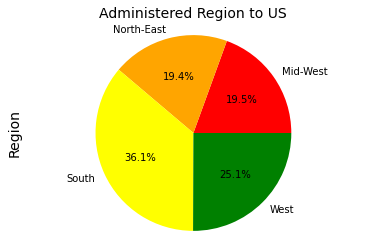

In [73]:
labels = ['Mid-West', 'North-East', 'South', 'West']

sizes = [19.40, 19.31, 36.04, 24.99]

colors = ['red','orange','yellow','green']

plt.pie(sizes,colors=colors, labels=labels, autopct="%1.1f%%")

plt.ylabel('Region', fontsize=14)
plt.title('Administered Region to US',fontsize=14)
plt.axis('equal')
plt.show()

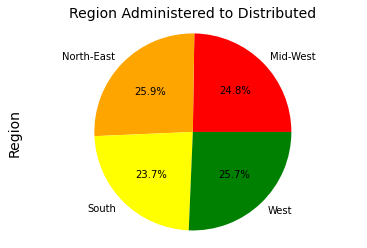

In [74]:
labels = ['Mid-West', 'North-East', 'South', 'West']

sizes = [81.83, 85.69, 78.18, 84.82]

colors = ['red','orange','yellow','green']

plt.pie(sizes,colors=colors, labels=labels, autopct="%1.1f%%")

plt.ylabel('Region', fontsize=14)
plt.title('Region Administered to Distributed',fontsize=14)
plt.axis('equal')
plt.show()

<AxesSubplot:xlabel='Region'>

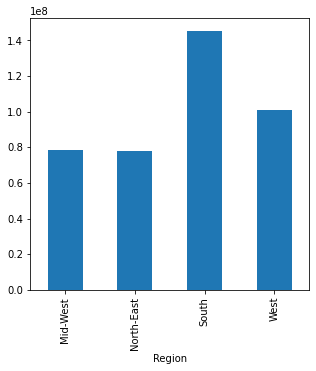

In [43]:
total_admin = region_agg["Total Administered"].plot.bar(y="Total Administered", figsize=(5, 5))
display(total_admin)

#tp_by_dr = clean_df.groupby('Drug Regimen')['Timepoint'].count()
#display(tp_by_dr)
#tp_by_dr_bar = tp_by_dr.plot.bar(y='Drug Regimen', figsize=(5, 5))

#purchase_agg=purchase_data.groupby('Age Ranges').agg(Count=('Purchase ID','count'),Average=('Price','mean'),Total=('Price','sum'), Players=('SN','nunique'))

<AxesSubplot:xlabel='Region'>

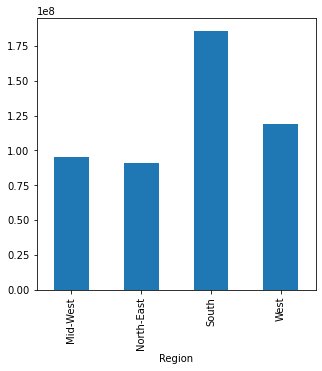

In [44]:
total_dist = region_agg["Total Distributed"].plot.bar(y="Total Distributed", figsize=(5, 5))
display(total_dist)

In [ ]:
region_agg=region_agg.rename(columns={
    'Total_Administered':'Total Administered',
    'Total_Distributed':'Total Distributed',
    'Region_US_Admin_Ratio':'Administered Region to US',
    'Region_Admin_Dist_Ratio':'Region Administered to Distributed'})


In [ ]:
# Population Data
populationData = pd.read_csv('Resources/2019_Census_US_Population_Data_By_State_Lat_Long.csv')

# Get the most recent date for filtering
freshDate = date.today() - timedelta(days=1)
freshDate = date.strftime(freshDate,"%Y%m%d")
freshDate = freshDate[0:4] + "-" + freshDate[4:6] + "-" + freshDate[6:8]



In [ ]:
# Vaccination data, for most recent date
vaccinationData = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/us_state_vaccinations.csv')
vaccinationByLocation = vaccinationData.loc[(vaccinationData.date == freshDate)][["location", "people_vaccinated"]]

# Vaccination and population data
vaccinationAndPopulationByLocation = pd.merge(populationData, vaccinationByLocation, left_on='STATE',right_on='location').drop(columns="location")

# Calculate percentage vaccinated by state
vaccinationAndPopulationByLocation["percent_vaccinated"] = vaccinationAndPopulationByLocation["people_vaccinated"] / vaccinationAndPopulationByLocation["POPESTIMATE2019"]

vaccinationAndPopulationByLocation

In [ ]:
# Q1. Which vaccine was distributed the most?

In [ ]:
manufacturer_df=us_vaccine_admin_df.loc[:,['State','Administered_Moderna','Administered_Pfizer', 'Administered_J&J']]

In [ ]:
manufacturer_df =manufacturer_df.set_index(['State'])
manufacturer_df 

In [ ]:
sum_moderna=(manufacturer_df["Administered_Moderna"]).sum()
sum_moderna=(manufacturer_df["Administered_Moderna"]).sum() 

In [ ]:
sum_moderna

In [ ]:
sum_pfizer=(manufacturer_df["Administered_Pfizer"]).sum()
sum_pfizer=(manufacturer_df["Administered_Pfizer"]).sum()   

In [ ]:
sum_pfizer

In [ ]:
sum_jj=(manufacturer_df["Administered_J&J"]).sum()
sum_jj=(manufacturer_df["Administered_J&J"]).sum()   

In [ ]:
sum_jj

In [ ]:
data = [['Administered_Moderna', 151081384], ['Administered_Pfizer', 236557955], ['Administered_J&J', 15008617]]
df = pd.DataFrame(data, columns = ['Vaccine Type', 'Total'])
df

In [ ]:
data = {"Vaccine Type":["Moderna", "Pfizer", "J&J"],

        "Total":[151081384,236557955,15008617]

        };

# Dictionary loaded into a DataFrame       

dataFrame = pd.DataFrame(data=data);

 

# Draw a vertical bar chart

dataFrame.plot.bar(x="Vaccine Type", y="Total", rot=1000, title="Vaccine Distributed The Most");


In [ ]:
# Q2. Which population according to age group has a higher percentage of people vaccinated? 

manufacturer_df=us_vaccine_admin_df.loc[:,['State','Additional_Doses_50Plus_Percentage','Additional_Doses_18Plus_Percentage','Additional_Doses_65Plus_Percentage']]

In [ ]:
manufacturer_df =manufacturer_df.set_index(['State'])
manufacturer_df 

In [ ]:
Additional_Doses_18Plus_Percentage=(manufacturer_df["Additional_Doses_18Plus_Percentage"]).max()
Additional_Doses_18Plus_Percentage=(manufacturer_df["Additional_Doses_18Plus_Percentage"]).max() 

In [ ]:
Additional_Doses_18Plus_Percentage

In [ ]:
Additional_Doses_50Plus_Percentage=(manufacturer_df["Additional_Doses_50Plus_Percentage"]).max()
Additional_Doses_50Plus_Percentage=(manufacturer_df["Additional_Doses_50Plus_Percentage"]).max() 

In [ ]:
Additional_Doses_50Plus_Percentage

In [ ]:
Additional_Doses_65Plus_Percentage=(manufacturer_df["Additional_Doses_65Plus_Percentage"]).max()
Additional_Doses_65Plus_Percentage=(manufacturer_df["Additional_Doses_65Plus_Percentage"]).max() 

In [ ]:
Additional_Doses_65Plus_Percentage

In [ ]:
data = [['Additional_Doses_18Plus_Percentage', 10.4], ['Additional_Doses_50Plus_Percentage', 15.6], ['Additional_Doses_65Plus_Percentage', 23.7]]
df = pd.DataFrame(data, columns = ['Age Group', 'Percentage Total'])
df

In [ ]:
data = {"Age Group":["18 and Over", "50 and Over", "65 and Over"],

        "Total":[10.4,15.6,23.7]

        };

# Dictionary loaded into a DataFrame       

dataFrame = pd.DataFrame(data=data);

 

# Draw a vertical bar chart

dataFrame.plot.bar(x="Age Group", y="Total", rot=1000, title="Age Group Vaccinated the Most");
